In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
#importing train data for toyota corolla dataset
dataset = pd.read_csv('/Users/halders/Documents/Excelr/dataset/toyota-corolla/train.csv',index_col=0)
dataset.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
140,142,TOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT...,16450,20,1,2003,22588,Petrol,97,1,...,1,1,1,0,0,1,1,0,0,0
1373,1380,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,7950,75,6,1998,57144,Petrol,110,1,...,0,0,1,0,0,1,1,1,0,1
764,768,TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 ...,10950,59,10,1999,79660,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
898,902,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8950,65,4,1999,60000,Petrol,86,1,...,0,0,1,0,0,1,1,0,0,0
547,550,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3...,9950,55,2,2000,44537,Petrol,97,0,...,0,0,1,1,0,0,1,0,1,1


In [3]:
#converting few integers to categorical objects
dataset = dataset.astype({"Doors":'object', "Cylinders":'object', "Gears":'object'})

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 140 to 1324
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1292 non-null   int64 
 1   Model             1292 non-null   object
 2   Price             1292 non-null   int64 
 3   Age_08_04         1292 non-null   int64 
 4   Mfg_Month         1292 non-null   int64 
 5   Mfg_Year          1292 non-null   int64 
 6   KM                1292 non-null   int64 
 7   Fuel_Type         1292 non-null   object
 8   HP                1292 non-null   int64 
 9   Met_Color         1292 non-null   int64 
 10  Color             1292 non-null   object
 11  Automatic         1292 non-null   int64 
 12  cc                1292 non-null   int64 
 13  Doors             1292 non-null   object
 14  Cylinders         1292 non-null   object
 15  Gears             1292 non-null   object
 16  Quarterly_Tax     1292 non-null   int64 
 17  Weight      

In [5]:
dataset.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
dataset.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,...,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,721.592879,10732.469040,55.973684,5.568111,1999.621517,68627.468266,101.428793,0.681889,0.053406,1576.677245,...,0.575077,0.556502,0.979102,0.147059,0.256192,0.295666,0.772446,0.206656,0.147059,0.273220
std,415.016175,3622.465521,18.549306,3.365083,1.535513,37714.615258,15.257471,0.465923,0.224928,443.618871,...,0.494523,0.496990,0.143098,0.354302,0.436698,0.456518,0.419416,0.405064,0.354302,0.445785
min,1.000000,4400.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,8450.000000,44.000000,3.000000,1998.000000,42499.250000,86.000000,0.000000,0.000000,1400.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,723.500000,9900.000000,61.000000,5.000000,1999.000000,63831.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11926.250000,70.000000,8.000000,2001.000000,87676.250000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,31275.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.rename({'Age_08_04':'Age'}, axis='columns',inplace = True)
dataset.head()

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
140,142,TOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT...,16450,20,1,2003,22588,Petrol,97,1,...,1,1,1,0,0,1,1,0,0,0
1373,1380,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,7950,75,6,1998,57144,Petrol,110,1,...,0,0,1,0,0,1,1,1,0,1
764,768,TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 ...,10950,59,10,1999,79660,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
898,902,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8950,65,4,1999,60000,Petrol,86,1,...,0,0,1,0,0,1,1,0,0,0
547,550,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3...,9950,55,2,2000,44537,Petrol,97,0,...,0,0,1,1,0,0,1,0,1,1


In [8]:
x = dataset.drop(['Price', 'Model'], axis = 1)
y = dataset.iloc[:, 2]
x = pd.get_dummies(x)

In [9]:
x

,Id,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Quarterly_Tax,...,Color_Yellow,Doors_2,Doors_3,Doors_4,Doors_5,Cylinders_4,Gears_3,Gears_4,Gears_5,Gears_6
140,142,20,1,2003,22588,97,1,0,1400,85,...,0,0,0,0,1,1,0,0,1,0
1373,1380,75,6,1998,57144,110,1,0,1600,85,...,0,0,0,0,1,1,0,0,1,0
764,768,59,10,1999,79660,86,0,1,1300,85,...,0,0,0,0,1,1,0,0,1,0
898,902,65,4,1999,60000,86,1,0,1300,69,...,0,0,1,0,0,1,0,0,1,0
547,550,55,2,2000,44537,97,0,0,1400,69,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,752,61,8,1999,81170,110,1,0,1600,69,...,0,0,0,1,0,1,0,0,1,0
1355,1362,69,12,1998,60050,110,1,0,1600,69,...,0,0,1,0,0,1,0,0,1,0
1276,1283,75,6,1998,74096,110,1,0,1600,69,...,0,0,1,0,0,1,0,0,1,0
519,522,50,7,2000,50400,110,0,0,1600,85,...,0,0,0,0,1,1,0,0,1,0


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1033, 53)
(259, 53)
(1033,)
(259,)


In [12]:
y_test.head()

63      17950
150     17200
1398     8950
1152     8500
927      9250
Name: Price, dtype: int64

## Regression Model 

###  Random Forest Regression Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=300).fit(x_train, y_train)

In [14]:
rf.feature_importances_

array([0.10172551, 0.08617328, 0.06236282, 0.03177718, 0.09501702,
       0.02450341, 0.02386027, 0.00751729, 0.02458186, 0.02973846,
       0.06429555, 0.0232311 , 0.01210934, 0.01342254, 0.01145942,
       0.00447643, 0.01276709, 0.0179976 , 0.00587019, 0.01149105,
       0.01662855, 0.01777293, 0.01613693, 0.00390796, 0.01251578,
       0.01371603, 0.01848839, 0.01314927, 0.01892552, 0.01289132,
       0.02018982, 0.001774  , 0.00626084, 0.00674758, 0.0008184 ,
       0.01529894, 0.01772754, 0.01479011, 0.01868296, 0.01816884,
       0.01206959, 0.00056933, 0.00410909, 0.00047698, 0.        ,
       0.01835951, 0.0098571 , 0.01880283, 0.        , 0.0001789 ,
       0.0003558 , 0.00331835, 0.00293337])

In [15]:
x.columns

Index(['Id', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'cc', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Color_Beige', 'Color_Black', 'Color_Blue',
       'Color_Green', 'Color_Grey', 'Color_Red', 'Color_Silver',
       'Color_Violet', 'Color_White', 'Color_Yellow', 'Doors_2', 'Doors_3',
       'Doors_4', 'Doors_5', 'Cylinders_4', 'Gears_3', 'Gears_4', 'Gears_5',
       'Gears_6'],
      dtype='object')

In [16]:
feat_importances = pd.DataFrame(rf.feature_importances_,columns=['feature importance'])
feat_importances['Columns']= x.columns
feat_importances.head()

,feature importance,Columns
0,0.101726,Id
1,0.086173,Age
2,0.062363,Mfg_Month
3,0.031777,Mfg_Year
4,0.095017,KM


Text(0.5, 0, 'Random Forest Feature Importance')

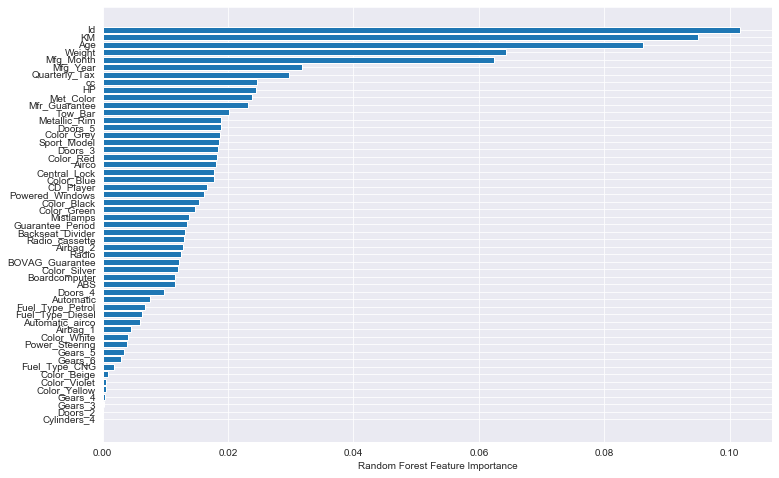

In [17]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
sorted_idx = rf.feature_importances_.argsort()

plt.barh(x.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [18]:
sorted_idx

array([48, 44, 49, 50, 43, 41, 34, 31, 52, 51, 23, 42, 15, 18, 32, 33,  7,
       46, 14, 19, 40, 12, 24, 16, 29, 27, 13, 25, 37, 35, 22, 20, 36, 21,
       17, 39, 45, 26, 38, 47, 28, 30, 11,  6,  5,  8,  9,  3,  2, 10,  1,
        4,  0])

In [19]:
coef_above0 = feat_importances.loc[feat_importances['feature importance'] > 0.021]

In [20]:
coef_above0['Columns'].values

array(['Id', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'cc', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee'], dtype=object)

#### using just the columns with higher feature importance to create a new dataframe , to fit random forest regression model

In [21]:
dataset_new= dataset[coef_above0['Columns'].values].copy()

In [22]:
dataset_new.head()

,Id,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,cc,Quarterly_Tax,Weight,Mfr_Guarantee
140,142,20,1,2003,22588,97,1,1400,85,1110,1
1373,1380,75,6,1998,57144,110,1,1600,85,1070,1
764,768,59,10,1999,79660,86,0,1300,85,1065,1
898,902,65,4,1999,60000,86,1,1300,69,1015,1
547,550,55,2,2000,44537,97,0,1400,69,1025,0


In [23]:
dataset_new.describe()

,Id,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,cc,Quarterly_Tax,Weight,Mfr_Guarantee
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,721.592879,55.973684,5.568111,1999.621517,68627.468266,101.428793,0.681889,1576.677245,87.256966,1072.002322,0.414087
std,415.016175,18.549306,3.365083,1.535513,37714.615258,15.257471,0.465923,443.618871,40.978926,50.293846,0.492754
min,1.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,1300.000000,19.000000,1000.000000,0.000000
25%,365.750000,44.000000,3.000000,1998.000000,42499.250000,86.000000,0.000000,1400.000000,69.000000,1040.000000,0.000000
50%,723.500000,61.000000,5.000000,1999.000000,63831.000000,110.000000,1.000000,1600.000000,85.000000,1070.000000,0.000000
75%,1081.250000,70.000000,8.000000,2001.000000,87676.250000,110.000000,1.000000,1600.000000,85.000000,1085.000000,1.000000
max,1442.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,16000.000000,283.000000,1480.000000,1.000000


In [24]:
x_train_new= dataset_new
y_train_new=y

In [25]:
#importing test data file for x_test and y_test data
dataset_test = pd.read_csv('/Users/halders/Documents/Excelr/dataset/toyota-corolla/test.csv',index_col=0)
dataset_test.head()

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
175,177,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,8,1,2004,8574,Petrol,110,1,Black,...,1,1,1,0,1,1,1,1,0,0
928,932,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,63,6,1999,55942,Petrol,110,1,Green,...,1,1,1,1,0,1,1,0,1,0
1010,1015,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,60,9,1999,36943,Petrol,110,0,Red,...,0,0,1,0,0,1,1,0,0,1
660,664,TOYOTA Corolla 2.0 SDN LINEA TERRA DSL 4/5-Doors,62,7,1999,112000,Diesel,72,0,Grey,...,0,0,1,0,0,0,0,0,0,0
618,622,TOYOTA Corolla 1.6 16V G6 2/3-Doors,64,5,1999,144000,CNG,110,1,Black,...,1,1,1,1,0,0,0,1,1,0


In [26]:
dataset_test.rename({'Age_08_04':'Age'}, axis='columns',inplace = True)
dataset_test.drop('Model', axis = 1,inplace = True)
dataset_test = dataset_test.astype({"Doors":'object', "Cylinders":'object', "Gears":'object'})
dataset_test = pd.get_dummies(dataset_test)
dataset_test.head()

,Id,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Quarterly_Tax,...,Color_Violet,Color_White,Color_Yellow,Doors_2,Doors_3,Doors_4,Doors_5,Cylinders_4,Gears_5,Gears_6
175,177,8,1,2004,8574,110,1,0,1600,85,...,0,0,0,0,0,0,1,1,1,0
928,932,63,6,1999,55942,110,1,0,1600,85,...,0,0,0,0,0,0,1,1,1,0
1010,1015,60,9,1999,36943,110,0,0,1600,85,...,0,0,0,0,0,0,1,1,1,0
660,664,62,7,1999,112000,72,0,0,2000,64,...,0,0,0,0,0,1,0,1,1,0
618,622,64,5,1999,144000,110,1,0,1600,72,...,0,0,0,0,1,0,0,1,0,1


In [27]:
dataset_test= dataset_test[coef_above0['Columns'].values]
dataset_test.head()

,Id,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,cc,Quarterly_Tax,Weight,Mfr_Guarantee
175,177,8,1,2004,8574,110,1,1600,85,1130,1
928,932,63,6,1999,55942,110,1,1600,85,1070,1
1010,1015,60,9,1999,36943,110,0,1600,85,1070,1
660,664,62,7,1999,112000,72,0,2000,64,1135,0
618,622,64,5,1999,144000,110,1,1600,72,1065,0


In [28]:
x_test_new= dataset_test

### <span id="11"></span> ** Random Forest Regression **

In [29]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor_rf.fit(x_train_new, y_train_new.ravel())
y_pred2 = regressor_rf.predict(x_test_new)

In [30]:
y_pred2.shape

(144,)

In [31]:
y_pred3 = pd.DataFrame({'Id':range(1,145),'Price':y_pred2})
y_pred3.to_csv('/Users/halders/Documents/Excelr/Assignments/Toyota_Corolla_submission_RF.csv',index = False)